In [117]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sb
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import pickle


In [80]:
ps = PorterStemmer()


In [32]:
pip install seaborn

     |████████████████████████████████| 292 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 900 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 2.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/kumarsanu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kumarsanu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
c_data = pd.read_csv('mail_data.csv')
print(c_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [13]:
data = c_data.where(pd.notnull(c_data),'')

In [14]:
data.shape

(5572, 2)

In [15]:
data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham', 'Category',] = 1

Spam - 0
Ham - 1

In [16]:
data.sample(5)

,Category,Message
5290,1,Dear where you. Call me
1577,1,No. To be nosy I guess. Idk am I over reacting...
1975,1,Thats cool. Where should i cum? On you or in y...
5321,1,Ok no problem... Yup i'm going to sch at 4 if ...
4042,0,Please call our customer service representativ...


In [17]:
data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [19]:
data = data.drop_duplicates(keep='first')


In [20]:
data.duplicated().sum()

0

In [21]:
data.shape

(5157, 2)

# Data Analysis

In [22]:
data['Category'].value_counts()
#this shows us that the data is imbalanced
#there are more ham messages than spam messages

1    4516
0     641
Name: Category, dtype: int64

In [23]:
data['num_char'] = data['Message'].apply(len)

In [24]:
data.head()

,Category,Message,num_char
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
data['num_words'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
data.head()

,Category,Message,num_char,num_words
0,1,"Go until jurong point, crazy.. Available only ...",111,24
1,1,Ok lar... Joking wif u oni...,29,8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,1,U dun say so early hor... U c already then say...,49,13
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
data['num_sentences'] = data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
data.head()

,Category,Message,num_char,num_words,num_sentences
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<AxesSubplot:xlabel='num_char', ylabel='Count'>

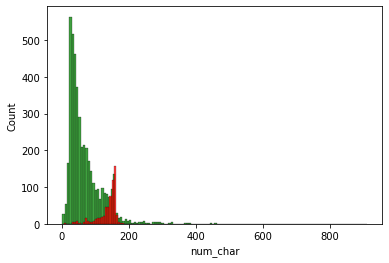

In [38]:

sb.histplot(data[data['Category'] == 1]['num_char'], color = 'green')
sb.histplot(data[data['Category'] == 0]['num_char'],color='red')

This plot gives us an idea that the Spam messages are made up of more characters i.e. are longer than the Ham messages.

<AxesSubplot:xlabel='num_words', ylabel='Count'>

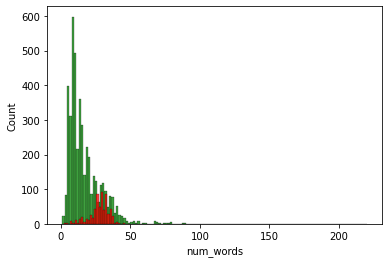

In [39]:
sb.histplot(data[data['Category'] == 1]['num_words'], color = 'green')
sb.histplot(data[data['Category'] == 0]['num_words'],color='red')

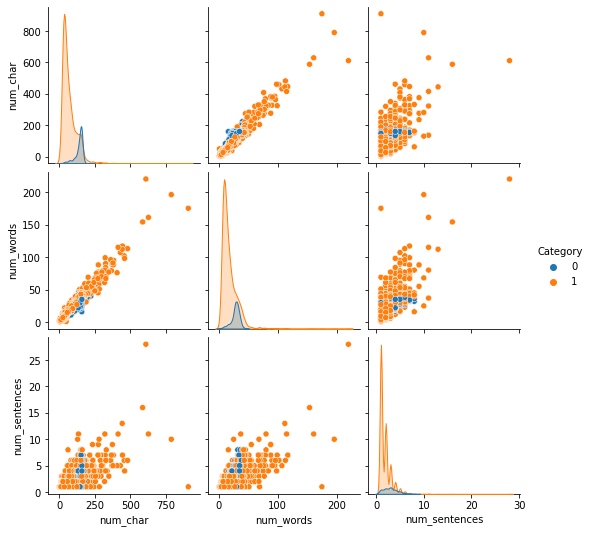

In [43]:
sb.pairplot(data,hue='Category')


<AxesSubplot:>

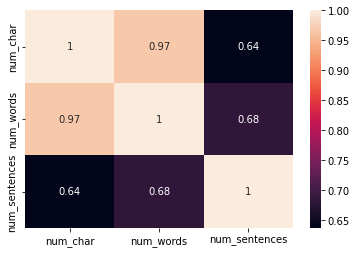

In [44]:
sb.heatmap(data.corr(),annot=True)

# Data Preprocesssing

In [61]:
def clean_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    list1 = []
    for i in message:
        if i.isalnum():
            list1.append(i)
    
    message = list1[:]
    list1.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            list1.append(i)
            
    message = list1[:]
    list1.clear()
    
    for i in message:
        list1.append(ps.stem(i))
    
            
    return " ".join(list1)

In [120]:
clean_message("Even my brother is not like to speak with me. They treat me like running patent.")

'even brother like speak treat like run patent'

In [63]:
data['transformed_text'] = data['Message'].apply(clean_message)

In [64]:
data.head()

,Category,Message,num_char,num_words,num_sentences,transformed_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [69]:
spam_word_set = []
for msg in data[data['Category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        spam_word_set.append(word)


/Users/kumarsanu/opt/anaconda3/envs/py377/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


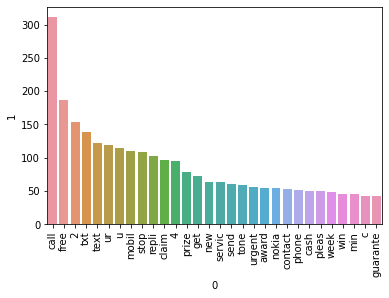

In [70]:
sb.barplot(pd.DataFrame(Counter(spam_word_set).most_common(30))[0],pd.DataFrame(Counter(spam_word_set).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [75]:
ham_word_set = []
for msg in data[data['Category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        ham_word_set.append(word)

/Users/kumarsanu/opt/anaconda3/envs/py377/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


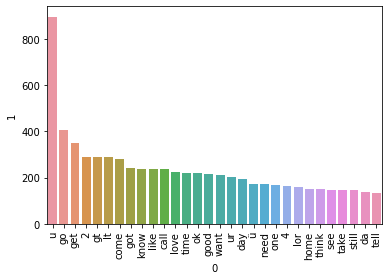

In [76]:
sb.barplot(pd.DataFrame(Counter(ham_word_set).most_common(30))[0],pd.DataFrame(Counter(ham_word_set).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model

In [81]:
tf = TfidfVectorizer()

In [85]:
X = tf.fit_transform(data['transformed_text']).toarray()

In [86]:
X.shape

(5157, 6781)

In [88]:
y = data['Category'].values

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [107]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [108]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9612403100775194
[[ 87  40]
 [  0 905]]
0.9576719576719577


In [109]:
gnb.fit(X_train,y_train)
y_pred2 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8682170542635659
[[110  17]
 [119 786]]
0.9788293897882939


In [110]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9718992248062015
[[101  26]
 [  3 902]]
0.9719827586206896


In [111]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [112]:
knc.fit(X_train,y_train)
y_pred2 = knc.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9040697674418605
[[ 28  99]
 [  0 905]]
0.901394422310757


In [113]:
from sklearn.linear_model import LogisticRegression
lc = LogisticRegression()
lc.fit(X_train,y_train)
y_pred2 = lc.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9505813953488372
[[ 79  48]
 [  3 902]]
0.9494736842105264


In [115]:
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))